# TikTok: User Engagement Analysis

In [167]:
# Direct Download the data off the link:
# https://www.kaggle.com/datasets/yakhyojon/tiktok/download?datasetVersionNumber=1
# placed into data folder manually

In [261]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import resample

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import (accuracy_score,
                             precision_score,
                             recall_score,
                             f1_score, 
                             roc_auc_score, 
                             confusion_matrix,
                             classification_report)

from sklearn.model_selection import GridSearchCV

In [274]:
# read data 
df = pd.read_csv('./data/tiktok_dataset.csv')

rows, columns = df.shape
print(f'rows: {rows}\ncolumns: {columns}')

display(df.head(10))
display(df.sample(10))
display(df.tail(10))

rows: 19382
columns: 12


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
5,6,claim,8972200955,35,someone shared with me that gross domestic pro...,not verified,under review,336647.0,175546.0,62303.0,4293.0,1857.0
6,7,claim,4958886992,16,someone shared with me that elvis presley has ...,not verified,active,750345.0,486192.0,193911.0,8616.0,5446.0
7,8,claim,2270982263,41,someone shared with me that the best selling s...,not verified,active,547532.0,1072.0,50.0,22.0,11.0
8,9,claim,5235769692,50,someone shared with me that about half of the ...,not verified,active,24819.0,10160.0,1050.0,53.0,27.0
9,10,claim,4660861094,45,someone shared with me that it would take a 50...,verified,active,931587.0,171051.0,67739.0,4104.0,2540.0


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
7269,7270,claim,5400072644,21,a colleague read in the news a claim that ant...,not verified,active,140888.0,76236.0,6189.0,831.0,144.0
13621,13622,opinion,2843175811,48,my friends' view is that children are born les...,not verified,active,9568.0,1536.0,407.0,3.0,0.0
15266,15267,opinion,6855311738,44,my family's feeling is that china owns all of ...,not verified,active,6896.0,372.0,139.0,6.0,1.0
15034,15035,opinion,3417765185,58,my family's understanding is that mobile phone...,not verified,active,611.0,173.0,22.0,4.0,1.0
624,625,claim,7979086188,45,the news claimed someone discovered that sound...,not verified,active,389280.0,209190.0,7544.0,2937.0,1671.0
14852,14853,opinion,9776183849,51,my family's opinion is that there are currentl...,not verified,active,2820.0,570.0,99.0,13.0,3.0
14516,14517,opinion,4186807844,21,my friends' belief is that the largest prime n...,not verified,active,5000.0,124.0,46.0,2.0,1.0
13440,13441,opinion,8919532726,41,my friends' point of view is that an average h...,not verified,active,1001.0,257.0,93.0,2.0,0.0
12439,12440,opinion,6863513391,10,our view is that adult cats only meow to humans,not verified,active,5514.0,1557.0,288.0,24.0,8.0
12584,12585,opinion,5065377128,24,our thinking is that humans will live on mars ...,not verified,active,543.0,61.0,2.0,1.0,0.0


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
19372,19373,NaN,5731766527,16,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19373,19374,NaN,5731838072,46,NaN,verified,active,NaN,NaN,NaN,NaN,NaN
19374,19375,NaN,3559825127,42,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19375,19376,NaN,2159797367,45,NaN,verified,active,NaN,NaN,NaN,NaN,NaN
19376,19377,NaN,4099538565,7,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19377,19378,NaN,7578226840,21,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19378,19379,NaN,6079236179,53,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19379,19380,NaN,2565539685,10,NaN,verified,under review,NaN,NaN,NaN,NaN,NaN
19380,19381,NaN,2969178540,24,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19381,19382,NaN,8132759688,13,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN


In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [276]:
# Checking for missing
df.isnull().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [277]:
# percent missing
298/rows  

0.015375090289959757

In [278]:
# drop missing; still will contain roughly 98% of the data
df2 = df.dropna()

In [279]:
df2.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19084.000000,1.908400e+04,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9542.500000,5.624840e+09,32.423811,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5509.220604,2.537030e+09,16.226470,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4771.750000,3.425100e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9542.500000,5.609500e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14313.250000,7.840823e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19084.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [280]:
# feature eng as a numeric column
text_len = df2.loc[:, 'video_transcription_text'].apply(func=lambda x: len(x)) 
df2.loc[:,'text_length'] = text_len

/var/folders/hy/m73nj7zd0f746_my9g1b255h0000gn/T/ipykernel_36700/2855175077.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:,'text_length'] = text_len


In [281]:
# about 8.6% of accounts are currently banned 
display(df2['author_ban_status'].value_counts())
display(df2['author_ban_status'].value_counts(normalize=True))

author_ban_status
active          15383
under review     2066
banned           1635
Name: count, dtype: int64

author_ban_status
active          0.806068
under review    0.108258
banned          0.085674
Name: proportion, dtype: float64

In [282]:
# lets explore ban status for a bit 
banned = df2[df2['author_ban_status'] == 'banned']
banned

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
22,23,claim,7986031283,52,"someone shared with me that about once a year,...",not verified,banned,60096.0,34245.0,11345.0,219.0,77.0,102
31,32,claim,7730527836,21,someone shared with me that a blue whale's hea...,not verified,banned,376637.0,226700.0,69329.0,2060.0,278.0,85
61,62,claim,1712882974,32,a friend shared with a friend that starting in...,not verified,banned,29060.0,1219.0,171.0,3.0,1.0,169
67,68,claim,6496578100,55,a friend shared with a friend that sputnik was...,not verified,banned,663764.0,113266.0,31512.0,2325.0,564.0,86
75,76,claim,2473723793,17,a friend shared with a friend that the eiffel ...,not verified,banned,248398.0,139777.0,17309.0,1639.0,209.0,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18859,18860,opinion,5028862167,10,my colleagues are convinced that our sense of...,not verified,banned,9282.0,1415.0,121.0,21.0,1.0,107
18886,18887,opinion,7145832233,24,my colleagues are convinced that applying an ...,not verified,banned,3669.0,217.0,74.0,3.0,1.0,136
18916,18917,opinion,8630947117,28,in my opinion american basketball legend wilt ...,not verified,banned,2311.0,534.0,68.0,3.0,1.0,84
18970,18971,opinion,5975001371,34,in my opinion sea otters are born unable to swim,verified,banned,581.0,150.0,11.0,4.0,1.0,48


In [283]:
# well of course most of the banned accounst are not verified; a bit unbalanced there
display(banned['verified_status'].value_counts())
display(banned['verified_status'].value_counts(normalize=True))

verified_status
not verified    1590
verified          45
Name: count, dtype: int64

verified_status
not verified    0.972477
verified        0.027523
Name: proportion, dtype: float64

In [284]:
# so most banned accounts are claims
display(banned['claim_status'].value_counts())
display(banned['claim_status'].value_counts(normalize=True))

claim_status
claim      1439
opinion     196
Name: count, dtype: int64

claim_status
claim      0.880122
opinion    0.119878
Name: proportion, dtype: float64

In [285]:
num_col

['video_duration_sec',
 'video_view_count',
 'video_like_count',
 'video_share_count',
 'video_download_count',
 'video_comment_count']

/Users/michaelfronda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelfronda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/michaelfronda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelfronda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

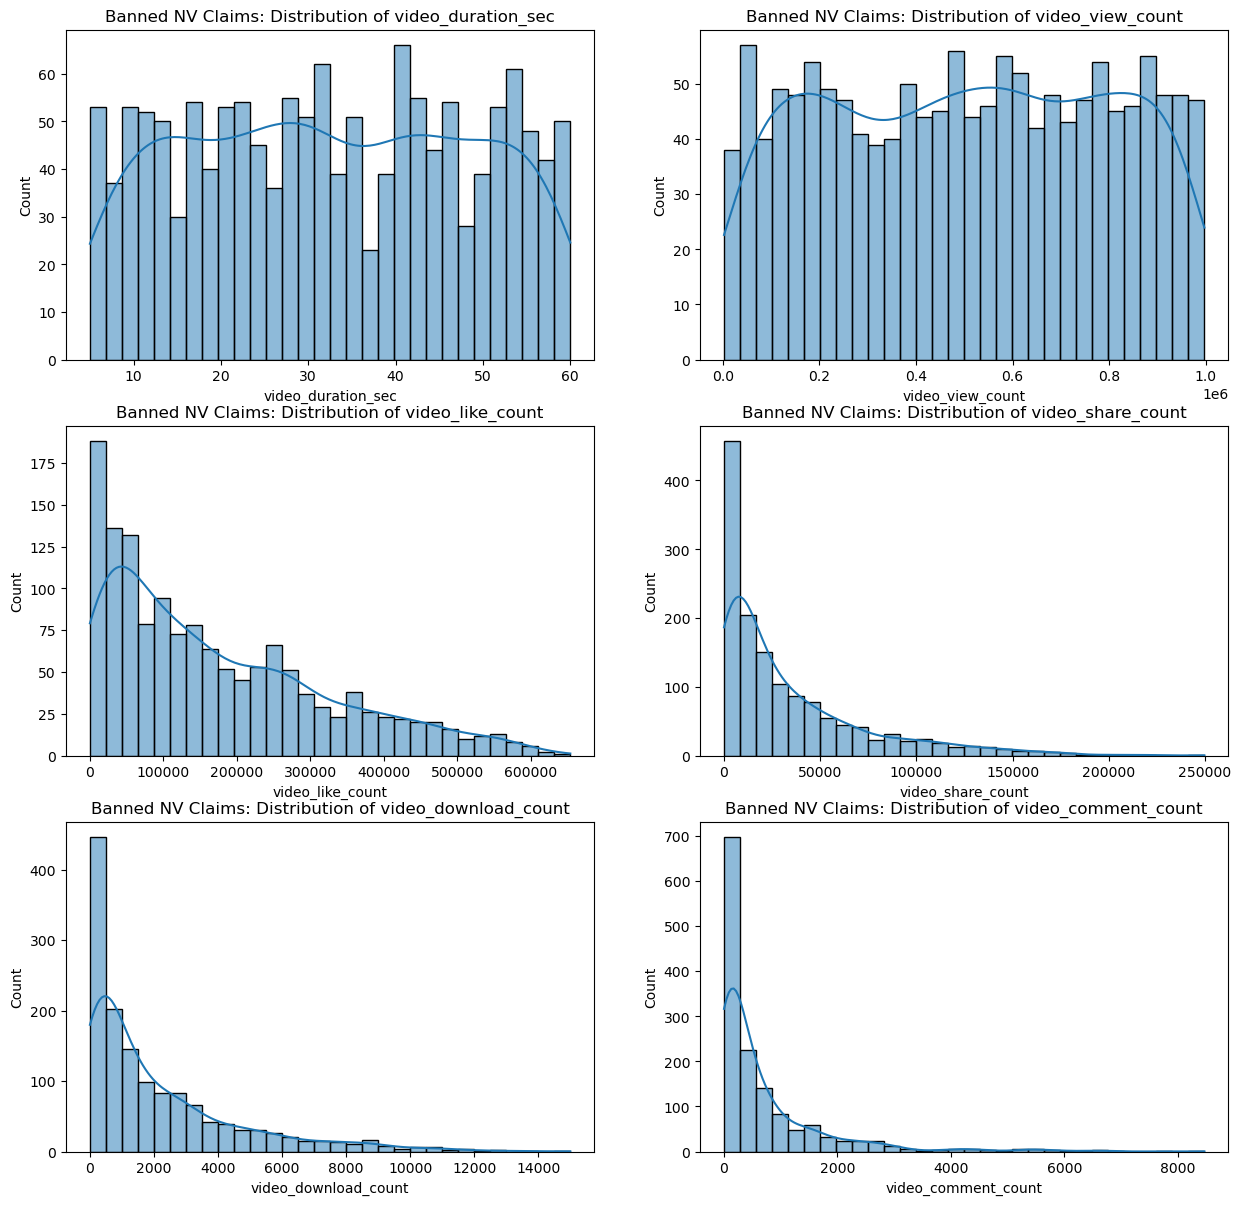

In [286]:
# explore majority class: claims and not verified
ban_nv_claims = banned[(banned['claim_status'] == 'claim') & (banned['verified_status'] == 'not verified')]

ids = ['#', 'video_id']

num_col = list(df.select_dtypes(include=(float, int)).columns)
num_col = [c for c in num_col if c not in ids]

plt.figure(figsize=(15, 30))

for i, col in enumerate(ban_nv_claims[num_col], 1):

    plt.subplot(6, 2, i)
    sns.histplot(ban_nv_claims[col], bins=30, kde=True)
    plt.title(f'Banned NV Claims: Distribution of {col}')

/Users/michaelfronda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelfronda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelfronda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelfronda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

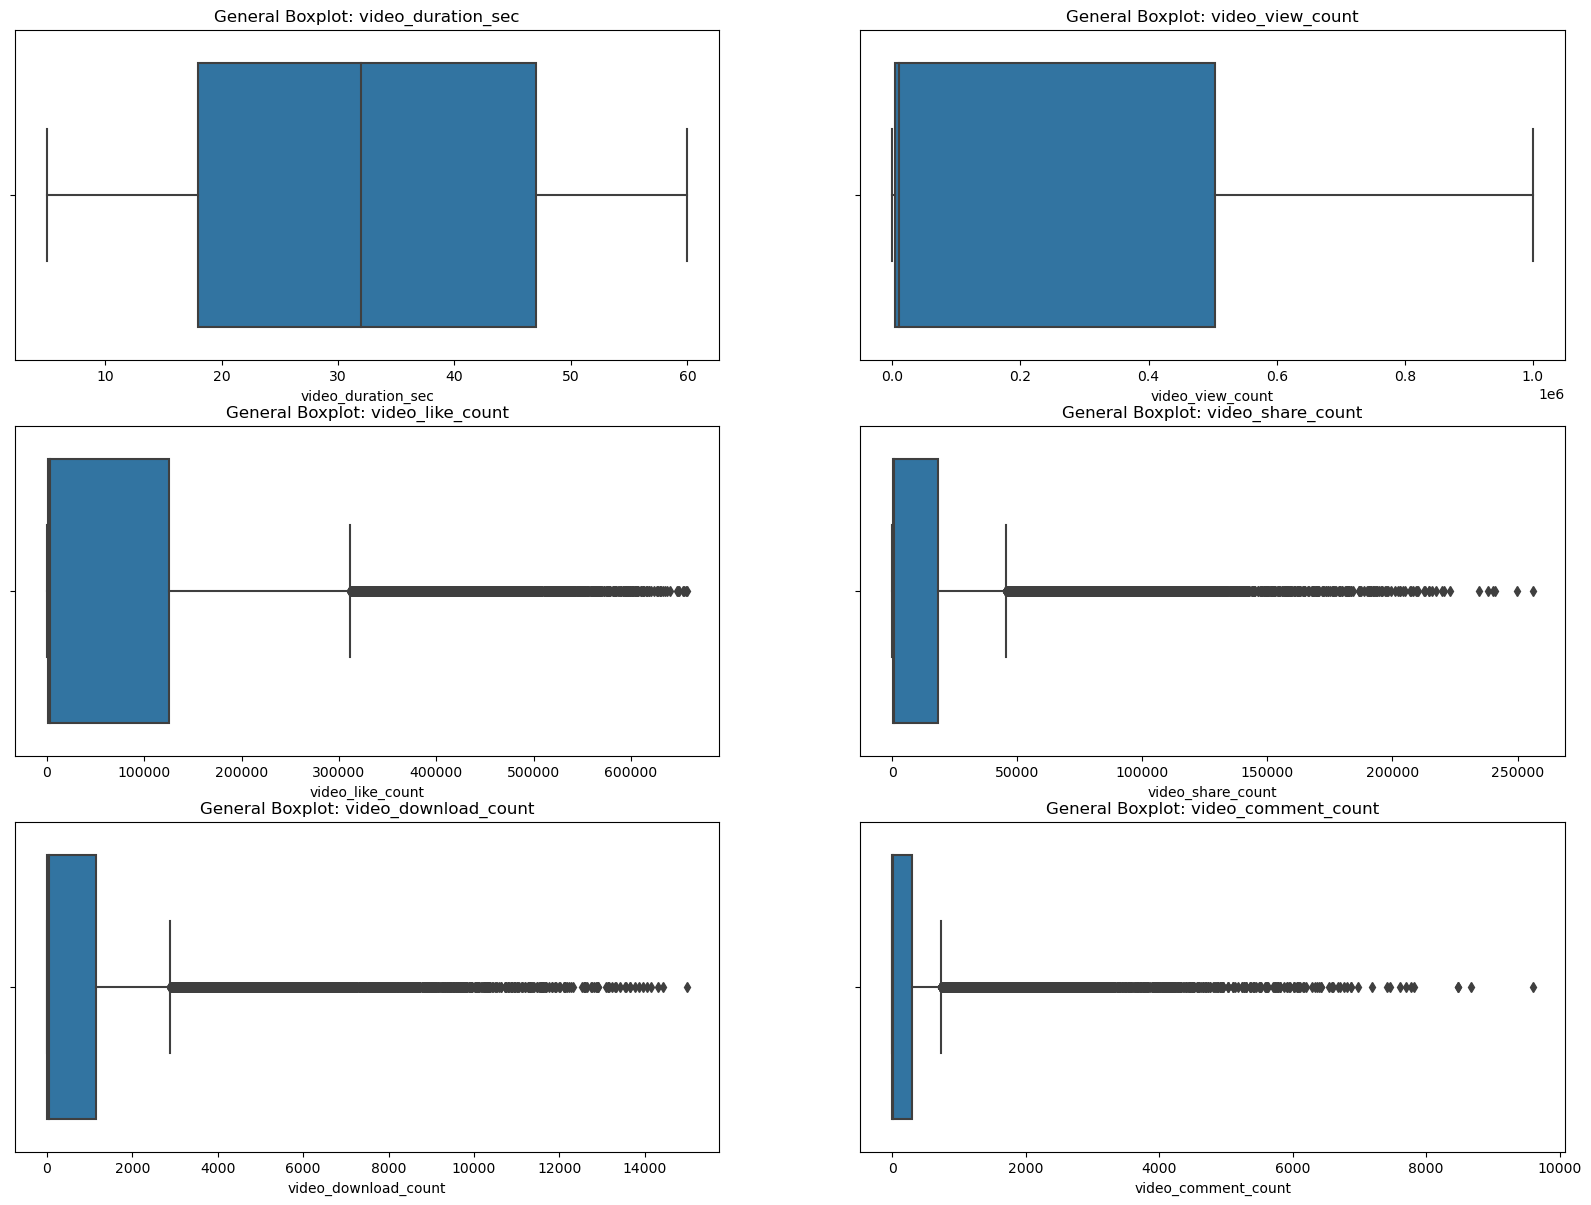

In [287]:
# lets back up and look at the data as a whole to observe some of these numerical columns

plt.figure(figsize=(20,30))

for i, col in enumerate(df2[num_col], 1):
    
    plt.subplot(6,2,i)
    sns.boxplot(df2, x=col)
    plt.title(f'General Boxplot: {col}')

In [288]:
lr = df2['video_comment_count'].quantile(0.25)
ur = df2['video_comment_count'].quantile(0.75)

iqr = ur - lr 
max_limit = ur + 1.5 * iqr
max_limit 

728.5

In [289]:
# potential drops 
no_outliers_count = df2[df2['video_comment_count'] > max_limit].shape[0]
new_rows = df2.shape[0]

print(f'Lose up to: {1 - (no_outliers_count/new_rows)}%')

Lose up to: 0.8538566338293858%


## Observations so far 

Long tails for likes, shares, downloads and comments; Right skewed data. 

Makes sense for these `count` columns

Another note is that dropping outliers could lead to an 85% loss in the data. Lets alleviate that 

/Users/michaelfronda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelfronda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/michaelfronda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelfronda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

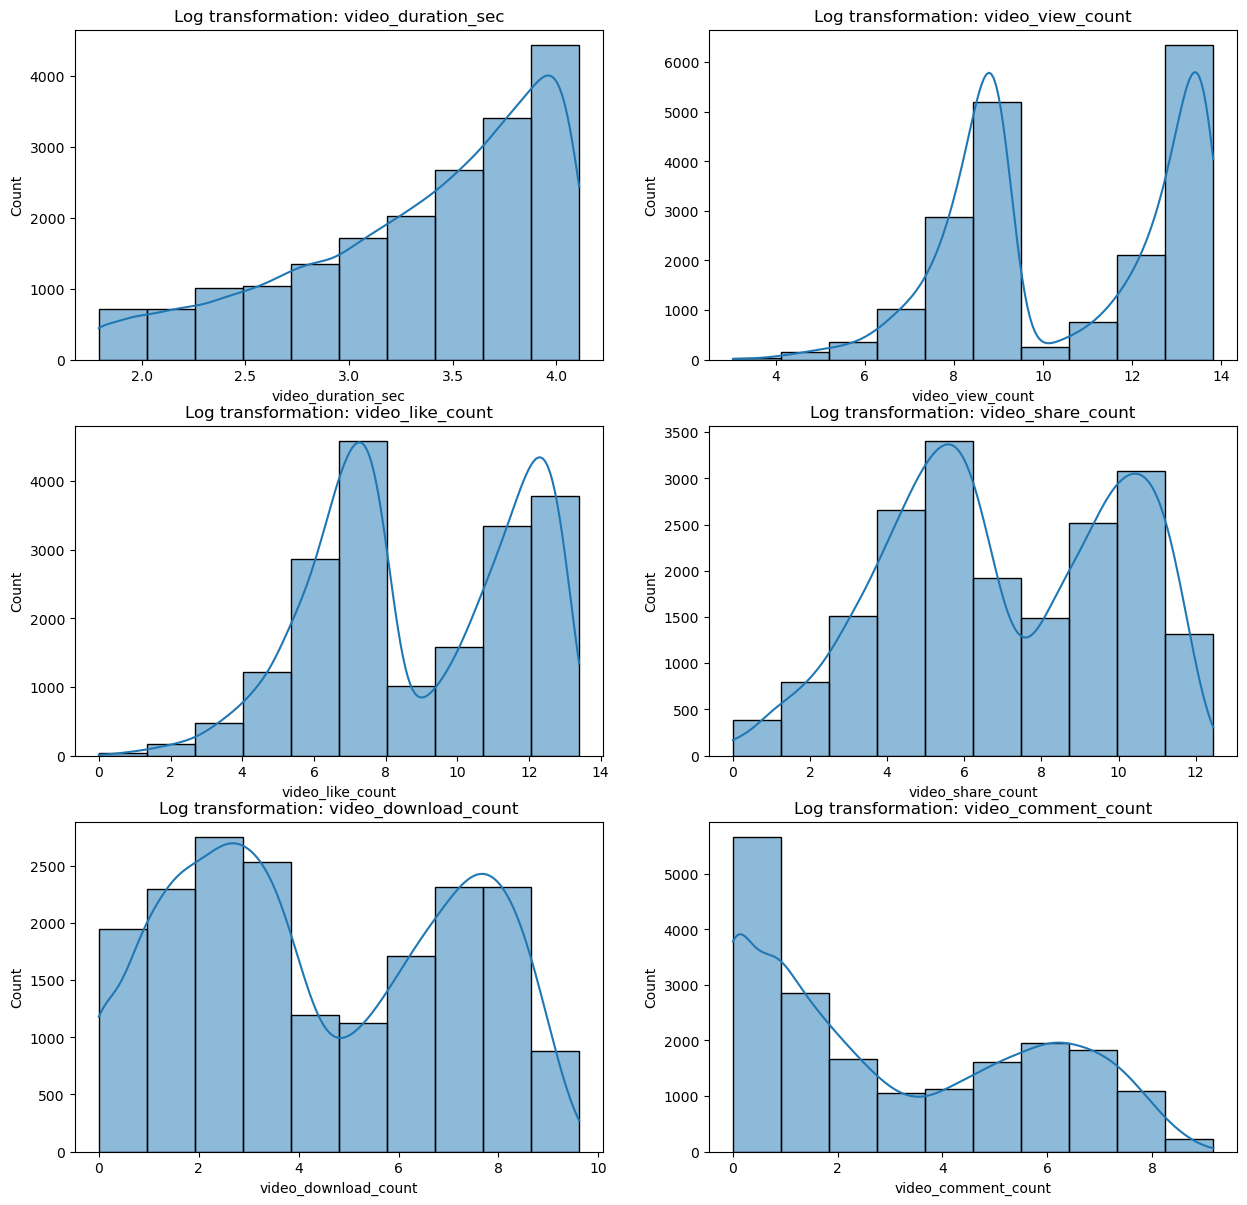

In [290]:
# scaling 
plt.figure(figsize=(15, 30))

for i, col in enumerate(df2[num_col], 1):

    plt.subplot(6, 2, i)
    sns.histplot(np.log1p(df2[col]), bins=10, kde=True)
    plt.title(f'Log transformation: {col}')

In [291]:
df3 = df2.copy()

for c in num_col:
    df3.loc[:, c] = np.log1p(df3[c])

df3.sample(5)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
1895,1896,claim,4655035576,1.791759,a friend learned on social media a claim that...,not verified,active,13.315986,11.139264,10.168732,6.315358,5.347108,91
7665,7666,claim,7440107286,1.945910,someone read a report mentioning that there ar...,not verified,active,10.470278,9.129672,7.603898,4.564348,2.484907,103
7716,7717,claim,8016961075,3.583519,someone read a report claiming that a common g...,not verified,banned,13.112828,12.188046,10.516969,8.180881,5.252273,79
16570,16571,opinion,1872610471,4.025352,my colleagues' sentiment is that dogs can unde...,verified,active,5.043425,3.891820,2.944439,0.693147,0.000000,86
4064,4065,claim,5693236665,4.060443,someone read in a discussion board that it wo...,not verified,active,13.319022,12.486723,11.534178,7.557995,5.549076,115


## Multi class classification? 
}
Although we have three classes in the ban status, and that we can label under review as "risky" content, let's take it out for the analysis. We want to see if we seperate and capture enough variance to seperate ban / active accounts. 

In [292]:
# we will lose 10% of our data
df3['author_ban_status'].value_counts(normalize=True)

author_ban_status
active          0.806068
under review    0.108258
banned          0.085674
Name: proportion, dtype: float64

In [293]:
df4 = df3.loc[df3['author_ban_status'] != 'under review', :]

In [294]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded = encoder.fit_transform(df4[['claim_status', 'author_ban_status']])
feats_enc = pd.DataFrame(encoded, columns=encoder.get_feature_names_out())

df5 = pd.concat([df4.drop(columns=['#', 'video_id', 'claim_status', 'verified_status','author_ban_status', 'video_transcription_text']).reset_index(drop=True), feats_enc], axis=1)

## Correlation 

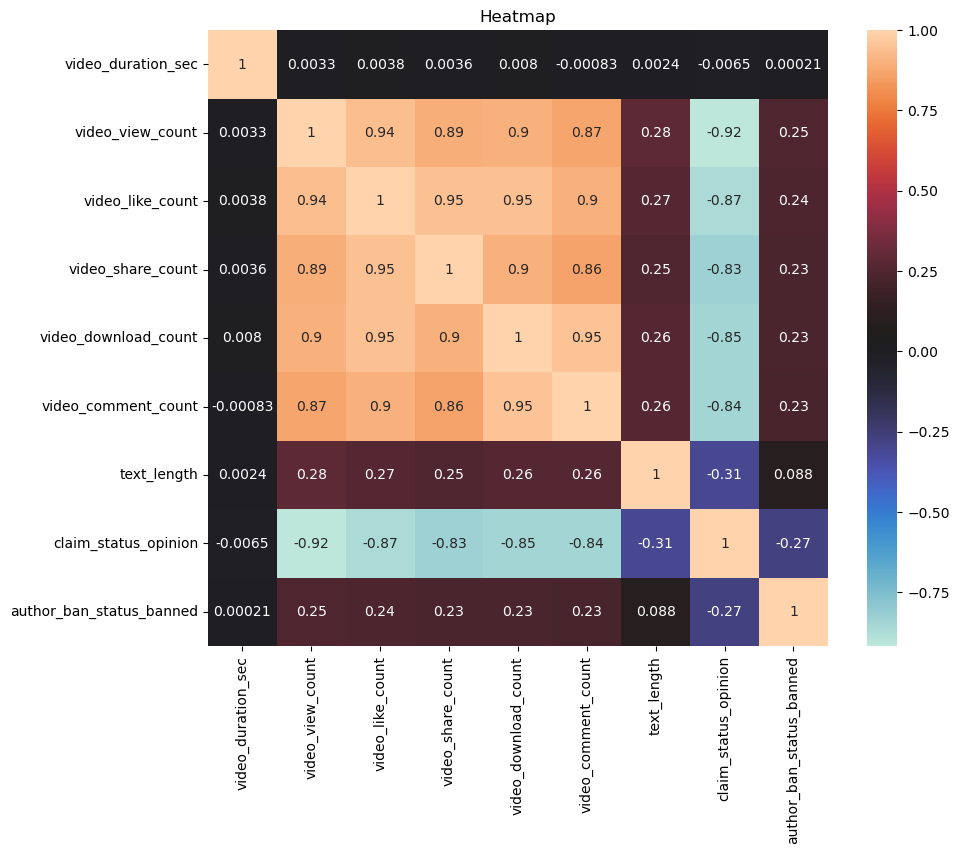

In [295]:
plt.figure(figsize=(10, 8))
sns.heatmap(df5.corr(numeric_only=True), annot=True, cmap="icefire")
plt.title("Heatmap")
plt.show()

No multicollinearity for features in relation to ban status

# Upsampling low count class

Due to unbalanced classes lets upsample 

In [296]:
encoder.get_feature_names_out()

array(['claim_status_opinion', 'author_ban_status_banned'], dtype=object)

In [297]:
minority = df5[df5['author_ban_status_banned'] == 1]
majority = df5[df5['author_ban_status_banned'] == 0]

upsampled = resample(minority, replace=True, n_samples=len(majority), random_state=42)

df_upsampled = pd.concat([majority, upsampled]).reset_index(drop=True)
df_upsampled['author_ban_status_banned'].value_counts()

author_ban_status_banned
0.0    15383
1.0    15383
Name: count, dtype: int64

In [298]:
# Creation of the proper variables
X = df_upsampled.drop(columns = ['author_ban_status_banned']) 
y = df_upsampled['author_ban_status_banned']


X_train, X_test, y_train, y_test = train_test_split(X, # Features; X
                                                    y, # Label/Target; y
                                                    test_size = 0.20, # 80/20 Split; Training 80%, Testing 20% 
                                                    random_state = 42) 

In [299]:
from sklearn.feature_extraction import DictVectorizer
train_dicts = X_train.to_dict(orient='records')
dv = DictVectorizer(sparse=True) # pickle
X_train = dv.fit_transform(train_dicts)

val_dicts = X_test.to_dict(orient='records')
X_test = dv.transform(val_dicts)

## Modeling

In [300]:
# Log Reg 
logreg = LogisticRegression(max_iter=1000)

logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [301]:
# Set the parameters to train as well as their ranges
param_grid_logreg= {'penalty': [None, 'l2']}

logreg_tuned = GridSearchCV(logreg, param_grid_logreg) 
# Train on balanced data, hypertuned based on gridsearch
logreg_tuned.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=1000),
             param_grid={'penalty': [None, 'l2']})

In [302]:
logreg_tuned.best_estimator_

LogisticRegression(max_iter=1000, penalty=None)

In [303]:
# get predictions
y_pred_logreg_tuned = logreg_tuned.predict(X_test)

# # AUC value entropy
pred_proba_logreg_tuned = logreg_tuned.predict_proba(X_test)[:, 1]
roc_auc_logreg_tuned = roc_auc_score(y_test, pred_proba_logreg_tuned)

# accuracy
acc_logreg_tuned = accuracy_score(y_test, y_pred_logreg_tuned)

print('Logistic Regression Hypertuned:\n===============================================\n')
print('Area under the ROC curve: {}'.format(roc_auc_logreg_tuned))
print('Accuracy Score: {}'.format(acc_logreg_tuned))

Logistic Regression Hypertuned:

Area under the ROC curve: 0.7261730225024248
Accuracy Score: 0.7284692882677933


In [304]:
# Random Forest 
rand_for = RandomForestClassifier(random_state = 42)

rand_for.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [305]:
# Set the parameters to train as well as their ranges
param_grid_forest = {"n_estimators": [25, 100, 400], 
                    "max_features": ['sqrt', 1], 
                    "max_depth": [8, 10],
                    "min_samples_split": [2, 6],
                    "min_samples_leaf": [2, 6]}

forest_tuned = GridSearchCV(rand_for, 
                            param_grid_forest, 
                            cv = 3, 
                            n_jobs = 1, 
                            verbose = 5)

# Train on balanced data, hypertuned based on gridsearch
forest_tuned.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV 1/3] END max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=25;, score=0.737 total time=   0.7s
[CV 2/3] END max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=25;, score=0.735 total time=   0.7s
[CV 3/3] END max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=25;, score=0.736 total time=   0.7s
[CV 1/3] END max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.736 total time=   2.5s
[CV 2/3] END max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.732 total time=   2.6s
[CV 3/3] END max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.732 total time=   2.6s
[CV 1/3] END max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400;, score=0.737 total ti

[CV 2/3] END max_depth=8, max_features=1, min_samples_leaf=6, min_samples_split=2, n_estimators=400;, score=0.730 total time=   7.7s
[CV 3/3] END max_depth=8, max_features=1, min_samples_leaf=6, min_samples_split=2, n_estimators=400;, score=0.726 total time=   7.3s
[CV 1/3] END max_depth=8, max_features=1, min_samples_leaf=6, min_samples_split=6, n_estimators=25;, score=0.733 total time=   0.5s
[CV 2/3] END max_depth=8, max_features=1, min_samples_leaf=6, min_samples_split=6, n_estimators=25;, score=0.730 total time=   0.5s
[CV 3/3] END max_depth=8, max_features=1, min_samples_leaf=6, min_samples_split=6, n_estimators=25;, score=0.729 total time=   0.5s
[CV 1/3] END max_depth=8, max_features=1, min_samples_leaf=6, min_samples_split=6, n_estimators=100;, score=0.733 total time=   1.8s
[CV 2/3] END max_depth=8, max_features=1, min_samples_leaf=6, min_samples_split=6, n_estimators=100;, score=0.729 total time=   1.8s
[CV 3/3] END max_depth=8, max_features=1, min_samples_leaf=6, min_sample

[CV 3/3] END max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=6, n_estimators=100;, score=0.738 total time=   3.1s
[CV 1/3] END max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=6, n_estimators=400;, score=0.743 total time=  12.3s
[CV 2/3] END max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=6, n_estimators=400;, score=0.738 total time=  12.0s
[CV 3/3] END max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=6, n_estimators=400;, score=0.737 total time=  13.3s
[CV 1/3] END max_depth=10, max_features=1, min_samples_leaf=6, min_samples_split=2, n_estimators=25;, score=0.737 total time=   0.8s
[CV 2/3] END max_depth=10, max_features=1, min_samples_leaf=6, min_samples_split=2, n_estimators=25;, score=0.739 total time=   0.7s
[CV 3/3] END max_depth=10, max_features=1, min_samples_leaf=6, min_samples_split=2, n_estimators=25;, score=0.737 total time=   0.7s
[CV 1/3] END max_depth=10, max_features=1, min_samples_leaf=6, mi

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=1,
             param_grid={'max_depth': [8, 10], 'max_features': ['sqrt', 1],
                         'min_samples_leaf': [2, 6],
                         'min_samples_split': [2, 6],
                         'n_estimators': [25, 100, 400]},
             verbose=5)

In [306]:
forest_tuned.best_estimator_

RandomForestClassifier(max_depth=10, max_features=1, min_samples_leaf=2,
                       n_estimators=25, random_state=42)

In [307]:
# get predictions
y_pred_forest_tuned = forest_tuned.predict(X_test)

# AUC value entropy
pred_proba_forest_tuned = forest_tuned.predict_proba(X_test)[:, 1]
roc_auc_forest_tuned = roc_auc_score(y_test, pred_proba_forest_tuned)

# accuracy
acc_forest_tuned = accuracy_score(y_test, y_pred_forest_tuned)

print('Random Forest Hypertuned:\n===============================================\n')
print('Area under the ROC curve: {}'.format(roc_auc_forest_tuned))
print('Accuracy Score: {}'.format(acc_forest_tuned))

Random Forest Hypertuned:

Area under the ROC curve: 0.8879384506384881
Accuracy Score: 0.7526811829704257


In [308]:
# Create an instance of AdaBoost
adaboost = AdaBoostClassifier(random_state = 42)

# train on balanced, untuned model
adaboost.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [309]:
# Set the parameters to train as well as their ranges
param_grid_ada = {"n_estimators": [25, 50, 100, 200],
                  "learning_rate": [0.25, 0.75, 1, 1.25, 1.5]}

ada_tuned = GridSearchCV(adaboost,
                         param_grid_ada,
                         cv = 3, 
                         n_jobs = 1, 
                         verbose = 5)

# Train on balanced data, hypertuned based on gridsearch
ada_tuned.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END learning_rate=0.25, n_estimators=25;, score=0.729 total time=   0.5s
[CV 2/3] END learning_rate=0.25, n_estimators=25;, score=0.726 total time=   0.4s
[CV 3/3] END learning_rate=0.25, n_estimators=25;, score=0.722 total time=   0.5s
[CV 1/3] END learning_rate=0.25, n_estimators=50;, score=0.729 total time=   1.6s
[CV 2/3] END learning_rate=0.25, n_estimators=50;, score=0.727 total time=   1.0s
[CV 3/3] END learning_rate=0.25, n_estimators=50;, score=0.722 total time=   1.0s
[CV 1/3] END learning_rate=0.25, n_estimators=100;, score=0.728 total time=   1.8s
[CV 2/3] END learning_rate=0.25, n_estimators=100;, score=0.727 total time=   1.6s
[CV 3/3] END learning_rate=0.25, n_estimators=100;, score=0.722 total time=   1.7s
[CV 1/3] END learning_rate=0.25, n_estimators=200;, score=0.729 total time=   4.2s
[CV 2/3] END learning_rate=0.25, n_estimators=200;, score=0.726 total time=   4.6s
[CV 3/3] END learning_rate=0.25,

GridSearchCV(cv=3, estimator=AdaBoostClassifier(random_state=42), n_jobs=1,
             param_grid={'learning_rate': [0.25, 0.75, 1, 1.25, 1.5],
                         'n_estimators': [25, 50, 100, 200]},
             verbose=5)

In [310]:
ada_tuned.best_estimator_

AdaBoostClassifier(learning_rate=1, n_estimators=200, random_state=42)

In [311]:
# get predictions
y_pred_ada_tuned = ada_tuned.predict(X_test)

# AUC value entropy
pred_proba_ada_tuned = ada_tuned.predict_proba(X_test)[:, 1]
roc_auc_ada_tuned = roc_auc_score(y_test, pred_proba_ada_tuned)

# accuracy
acc_ada_tuned = accuracy_score(y_test, y_pred_ada_tuned)

print('AdaBoost Hypertuned:\n===============================================\n')
print('Area under the ROC curve: {}'.format(roc_auc_ada_tuned))
print('Accuracy Score: {}'.format(acc_ada_tuned))

AdaBoost Hypertuned:

Area under the ROC curve: 0.7703538784101629
Accuracy Score: 0.7313942151446213


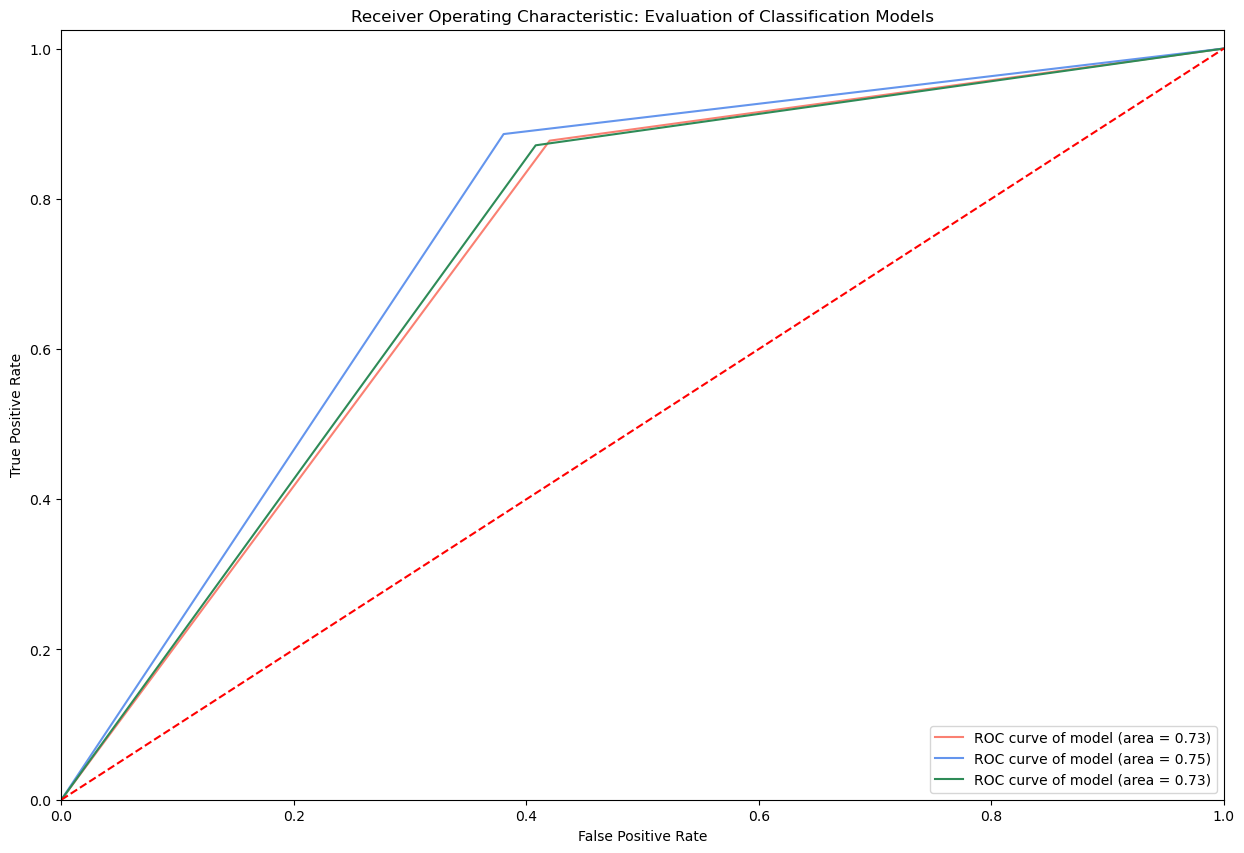

In [312]:
from sklearn import metrics

# LogReg
fpr_l, tpr_l, _ = metrics.roc_curve(y_test, y_pred_logreg_tuned)
roc_auc_l = metrics.auc(fpr_l, tpr_l)

# Forest
fpr_f, tpr_f, _ = metrics.roc_curve(y_test, y_pred_forest_tuned)
roc_auc_f = metrics.auc(fpr_f, tpr_f)

# AdaBoost
fpr_a, tpr_a, _ = metrics.roc_curve(y_test, y_pred_ada_tuned)
roc_auc_a = metrics.auc(fpr_a, tpr_a)


# Aggregate FPR, TPR and ROC_AUC
fpr = [fpr_l, fpr_f, fpr_a]
tpr = [tpr_l, tpr_f, tpr_a]
roc_auc = [roc_auc_l, roc_auc_f, roc_auc_a]

# Plot size and title
plt.figure(figsize=(15,10))
plt.title('Receiver Operating Characteristic: Evaluation of Classification Models')

# Create plots
colors = ['salmon', 'cornflowerblue', 'seagreen'] # colors to use 
for i, color in zip(range(4), colors): # loop to plot 
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of model (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))


plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.025])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Random Forest wins here! 

In [313]:
df5

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,claim_status_opinion,author_ban_status_banned
0,3.496508,11.855650,11.256173,9.854035,7.057898,6.529419,107,0.0,0.0
1,3.465736,13.712576,11.489565,7.958227,6.726233,5.799093,137,0.0,0.0
2,3.258097,12.988848,12.388207,10.457746,7.118826,6.371612,131,0.0,0.0
3,2.995732,10.936102,10.462760,8.321422,6.306275,5.030438,128,0.0,0.0
4,2.833213,13.528290,13.094361,12.175160,9.061492,8.602820,95,0.0,0.0
...,...,...,...,...,...,...,...,...,...
17013,3.912023,8.710784,6.049733,4.406719,2.197225,1.098612,65,1.0,0.0
17014,3.178054,7.997663,6.710523,4.262680,1.386294,0.000000,66,1.0,0.0
17015,3.931826,6.599870,4.634729,2.079442,1.098612,0.693147,53,1.0,0.0
17016,2.197225,8.130059,6.486161,4.820282,2.484907,1.609438,80,1.0,0.0


In [314]:
df5['author_ban_status_banned'].value_counts()

author_ban_status_banned
0.0    15383
1.0     1635
Name: count, dtype: int64

In [272]:
df5.to_csv('./data/final_data.csv', index=False) 